In [1]:
import pandas as pd
import numpy as np

import tubesml as tml

from source.validate import random_split, yearly_split
from source.report import report_points, report_victory, yearly_wrapper

from sklearn.linear_model import ElasticNet, LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold

In [2]:
df = pd.read_csv('data/processed_men/training_data.csv')

df.head()

,Season,DayNum,Team1,Team2,target,target_points,T1_Loc,T2_Loc,ID,T1_Ast,...,delta_off_edge,delta_def_edge,stage_Round1,stage_Round2,stage_Round3,stage_Round4,stage_final,stage_finalfour,T1_quality,T2_quality
0,2003,136,1112,1436,1,29,0,0,2003_1112_1436,17.642857,...,14.824796,10.852506,1,0,0,0,0,0,42.710561,0.650237
1,2003,136,1113,1272,1,13,0,0,2003_1113_1272,15.551724,...,15.831779,6.742637,1,0,0,0,0,0,7.704377,12.577559
2,2003,136,1141,1166,1,6,0,0,2003_1141_1166,15.620690,...,16.467359,12.440676,1,0,0,0,0,0,4.880807,13.600178
3,2003,136,1143,1301,1,2,0,0,2003_1143_1301,16.000000,...,4.199504,8.494016,1,0,0,0,0,0,10.200473,6.628850
4,2003,136,1140,1163,0,-5,0,0,2003_1140_1163,13.419355,...,13.298151,12.714904,1,0,0,0,0,0,8.352330,8.473791


In [3]:
kfolds = KFold(n_splits=7, shuffle=True, random_state=23)

In [4]:
df['seed_round1'] = 0
df['seed_round2'] = 0

df.loc[(df.T1_Seed < 5) & (df.stage_Round1 == 1), 'seed_round1'] = 1
df.loc[(df.T1_Seed < 2) & (df.stage_Round2 == 1), 'seed_round2'] = 1

df['off_edge_Seed'] = df['delta_Seed'] * df['delta_off_edge']
df['def_edge_Seed'] = df['delta_Seed'] * df['delta_def_edge']

df['T1_DR_edge'] = df['T1_DR_opportunity'] - df['T2_OR_opportunity']
df['T2_DR_edge'] = df['T2_DR_opportunity'] - df['T1_OR_opportunity']
df['delta_DR_edge'] = df['T1_DR_edge'] - df['T2_DR_edge']

df['T1_OR_edge'] = df['T1_OR_opportunity'] - df['T2_DR_opportunity']
df['T2_OR_edge'] = df['T2_OR_opportunity'] - df['T1_DR_opportunity']
df['delta_OR_edge'] = df['T1_OR_edge'] - df['T2_OR_edge']

df['T1_DR_rank'] = df['T1_DR'] * df['T1_Rank']
df['T2_DR_rank'] = df['T2_DR'] * df['T2_Rank']

# Classification


In [9]:
to_use = ['ID', 'target', 'Season']

d_car = ['Score', 'opp_score', 'True_shooting_perc', 
       'Stl', 'OR', 'off_rating', 'def_rating', 'TO', 'DR_edge', 'Rank', 'high_seed']
t_car = []
l2wd_car = []
l2wt_car = []

for c in d_car:
    to_use += [f'delta_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_{c}', f'T2_{c}']
    
for c in l2wd_car:
    to_use += [f'delta_L2W_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_L2W_{c}', f'T2_L2W_{c}']
    

to_use += ['seed_round1', 'seed_round2', 'off_edge_Seed', 'def_edge_Seed'] 

In [8]:
scores

,acc_oof,acc_test,logloss_oof,logloss_test,unsure_oof,unsure_test,year
0,0.7088,0.7937,0.5325,0.4930,23.8095,22.2222,2015
1,0.7202,0.7143,0.5289,0.5579,23.5119,27.7778,2016
2,0.7133,0.7698,0.5325,0.4888,23.2143,23.8095,2017
3,0.7183,0.7143,0.5267,0.5918,23.1647,16.6667,2018
4,0.7138,0.6825,0.5346,0.4790,24.0575,26.1905,2019
5,0.7149,0.7349,0.5310,0.5221,23.5516,23.3333,total


In [36]:
to_use = ['ID', 'target', 'Season']

d_car = ['Score', 'opp_score', 'True_shooting_perc', 
       'Stl', 'OR', 'off_rating', 'def_rating', 'TO', 'DR_edge', 'Rank', 'high_seed']
t_car = []
l2wd_car = ['N_wins']
l2wt_car = []

for c in d_car:
    to_use += [f'delta_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_{c}', f'T2_{c}']
    
for c in l2wd_car:
    to_use += [f'delta_L2W_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in l2wt_car:
    to_use += [f'T1_L2W_{c}', f'T2_L2W_{c}']
    

to_use += ['seed_round1', 'seed_round2', 'off_edge_Seed', 'def_edge_Seed']

In [35]:
scores

,acc_oof,acc_test,logloss_oof,logloss_test,unsure_oof,unsure_test,year
0,0.7093,0.7778,0.5330,0.4925,24.0575,21.4286,2015
1,0.7192,0.6984,0.5294,0.5596,23.8095,26.1905,2016
2,0.7133,0.7540,0.5327,0.4955,23.9087,22.2222,2017
3,0.7168,0.7143,0.5271,0.5905,23.2639,21.4286,2018
4,0.7148,0.6825,0.5351,0.4782,23.8095,26.1905,2019
5,0.7147,0.7254,0.5315,0.5233,23.7698,23.4921,total


In [67]:
to_use = ['ID', 'target', 'Season']

d_car = ['Score', 'opp_score', 'True_shooting_perc', 
       'Stl', 'OR', 'off_rating', 'def_rating', 'TO', 'DR_edge', 'Rank', 'high_seed']
t_car = []
l2wd_car = ['opp_score']
l2wt_car = []

for c in d_car:
    to_use += [f'delta_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_{c}', f'T2_{c}']
    
for c in l2wd_car:
    to_use += [f'delta_L2W_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in l2wt_car:
    to_use += [f'T1_L2W_{c}', f'T2_L2W_{c}']
    

to_use += ['seed_round1', 'seed_round2', 'off_edge_Seed', 'def_edge_Seed']

In [62]:
scores

,acc_oof,acc_test,logloss_oof,logloss_test,unsure_oof,unsure_test,year
0,0.7128,0.7778,0.5324,0.4917,23.1151,21.4286,2015
1,0.7197,0.7143,0.5286,0.5588,23.3631,29.3651,2016
2,0.7123,0.7778,0.5326,0.4866,23.1151,23.8095,2017
3,0.7168,0.7143,0.5264,0.5953,23.3631,17.4603,2018
4,0.7173,0.6825,0.5345,0.4816,23.1647,25.3968,2019
5,0.7158,0.7333,0.5309,0.5228,23.2242,23.4921,total


In [73]:
to_use = ['ID', 'target', 'Season']

d_car = ['Score', 'opp_score', 'True_shooting_perc', 
       'Stl', 'OR', 'off_rating', 'def_rating', 'TO', 'DR_edge', 'Rank', 'high_seed']
t_car = []
l2wd_car = ['opp_score', 'FGM_perc']
l2wt_car = []

for c in d_car:
    to_use += [f'delta_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_{c}', f'T2_{c}']
    
for c in l2wd_car:
    to_use += [f'delta_L2W_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in l2wt_car:
    to_use += [f'T1_L2W_{c}', f'T2_L2W_{c}']
    

to_use += ['seed_round1', 'seed_round2', 'off_edge_Seed', 'def_edge_Seed']

In [77]:
scores

,acc_oof,acc_test,logloss_oof,logloss_test,unsure_oof,unsure_test,year
0,0.7108,0.7778,0.5323,0.4872,22.9167,22.2222,2015
1,0.7247,0.7143,0.5289,0.5533,23.4127,28.5714,2016
2,0.7178,0.7540,0.5321,0.4924,23.2639,23.8095,2017
3,0.7192,0.7063,0.5261,0.5949,22.6190,22.2222,2018
4,0.7197,0.6825,0.5343,0.4808,23.3135,25.3968,2019
5,0.7185,0.7270,0.5308,0.5217,23.1052,24.4444,total


In [88]:
to_use = ['ID', 'target', 'Season']

d_car = ['Score', 'opp_score', 'True_shooting_perc', 
       'Stl', 'OR', 'off_rating', 'def_rating', 'TO', 'DR_edge', 'Rank', 'high_seed']
t_car = []
l2wd_car = ['opp_score', 'FGM_perc', 'possessions']
l2wt_car = []

for c in d_car:
    to_use += [f'delta_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_{c}', f'T2_{c}']
    
for c in l2wd_car:
    to_use += [f'delta_L2W_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in l2wt_car:
    to_use += [f'T1_L2W_{c}', f'T2_L2W_{c}']
    

to_use += ['seed_round1', 'seed_round2', 'off_edge_Seed', 'def_edge_Seed']

In [91]:
scores

,acc_oof,acc_test,logloss_oof,logloss_test,unsure_oof,unsure_test,year
0,0.7133,0.7778,0.5323,0.4845,23.3631,26.9841,2015
1,0.7207,0.7143,0.5286,0.5526,22.9663,28.5714,2016
2,0.7188,0.7619,0.5320,0.4908,23.5615,22.2222,2017
3,0.7183,0.7143,0.5259,0.5942,22.2222,20.6349,2018
4,0.7197,0.6825,0.5341,0.4791,23.0655,25.3968,2019
5,0.7182,0.7302,0.5306,0.5203,23.0357,24.7619,total


In [145]:
to_use = ['ID', 'target', 'Season']

d_car = ['Score', 'opp_score', 
       'Stl', 'off_rating', 'def_rating', 'DR_edge', 'OR', 'TO', 'Rank', 'high_seed']
t_car = []
l2wd_car = ['opp_score', 'FGM_perc', 'possessions']
l2wt_car = []

for c in d_car:
    to_use += [f'delta_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_{c}', f'T2_{c}']
    
for c in l2wd_car:
    to_use += [f'delta_L2W_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in l2wt_car:
    to_use += [f'T1_L2W_{c}', f'T2_L2W_{c}']
    

to_use += ['seed_round1', 'seed_round2', 'off_edge_Seed', 'def_edge_Seed']

In [148]:
scores

,acc_oof,acc_test,logloss_oof,logloss_test,unsure_oof,unsure_test,year
0,0.7128,0.7778,0.5322,0.4844,23.3135,26.9841,2015
1,0.7212,0.7143,0.5285,0.5527,23.0655,28.5714,2016
2,0.7183,0.7619,0.5319,0.4903,23.7103,22.2222,2017
3,0.7207,0.7143,0.5257,0.5939,22.3710,20.6349,2018
4,0.7202,0.6825,0.5339,0.4801,23.2143,26.1905,2019
5,0.7187,0.7302,0.5305,0.5203,23.1349,24.9206,total


In [12]:
to_use = ['ID', 'target', 'Season']

d_car = ['Score', 'opp_score', 
       'Stl', 'off_rating', 'def_rating', 'DR_edge', 'OR', 'TO', 'Rank', 'high_seed']
t_car = []
l2wd_car = ['opp_score', 'FGM_perc', 'possessions', 'Away']
l2wt_car = []

for c in d_car:
    to_use += [f'delta_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in t_car:
    to_use += [f'T1_{c}', f'T2_{c}']
    
for c in l2wd_car:
    to_use += [f'delta_L2W_{c}'] # f'T1_{c}', f'T2_{c}', 
    
for c in l2wt_car:
    to_use += [f'T1_L2W_{c}', f'T2_L2W_{c}']
    

to_use += ['seed_round1', 'seed_round2', 'off_edge_Seed', 'def_edge_Seed']

In [181]:
scores

,acc_oof,acc_test,logloss_oof,logloss_test,unsure_oof,unsure_test,year
0,0.7148,0.7857,0.5324,0.4847,23.8095,26.1905,2015
1,0.7237,0.7143,0.5288,0.5550,23.1151,25.3968,2016
2,0.7163,0.7778,0.5322,0.4916,24.2063,25.3968,2017
3,0.7212,0.7143,0.5262,0.5916,23.1151,22.2222,2018
4,0.7217,0.6825,0.5342,0.4806,23.5615,26.1905,2019
5,0.7195,0.7349,0.5307,0.5207,23.5615,25.0794,total


In [13]:
pipe = Pipeline([#('int', tml.DfPolynomial(degree=2, to_interact=[col for col in to_use if 'round' not in col and col not in ['ID', 'target', 'Season']])),
                 ('scl', tml.DfScaler()),
                 #('PCA', tml.DfPCA(n_components=0.95, compress=True, random_state=24)),
                 ('logit', LogisticRegression())])

grid_param = {'scl__method': ['robust'], 
              #'PCA__n_components': [0.5, 0.6, 0.7, 0.8, 0.9],
              'logit__C': np.arange(0.01, 0.15, 0.01)}

fitted, oof_pred, test_pred, imp_coef, train, y_train, test, y_test = yearly_split(df[to_use], pipe, kfolds, 'target', 
                                                                                   predict_proba=True, tune=True, param_grid=grid_param)

imp_coef['2019']

-0.5303244055910947
{'logit__C': 0.05, 'scl__method': 'robust'}
-0.525797133408074
{'logit__C': 0.04, 'scl__method': 'robust'}
-0.5307404420605654
{'logit__C': 0.04, 'scl__method': 'robust'}
-0.522837851580527
{'logit__C': 0.05, 'scl__method': 'robust'}
-0.5304546303042272
{'logit__C': 0.04, 'scl__method': 'robust'}


,mean,std
feat,,
delta_Rank,-0.553636,0.005380
def_edge_Seed,-0.287854,0.014863
off_edge_Seed,-0.281778,0.014462
delta_OR,0.263003,0.013267
delta_off_rating,0.228844,0.018318
delta_high_seed,0.184418,0.023352
delta_Stl,0.183212,0.010741
delta_def_rating,-0.165497,0.006755
delta_opp_score,-0.145626,0.008576


2015


Accuracy train: 		 0.7148
Accuracy test: 			 0.7857
Logloss train: 			 0.5324
Logloss test: 			 0.4847
Unsure train: 			 23.8095%
Unsure test: 			 26.1905%


________________________________________


2016


Accuracy train: 		 0.7237
Accuracy test: 			 0.7143
Logloss train: 			 0.5288
Logloss test: 			 0.555
Unsure train: 			 23.1151%
Unsure test: 			 25.3968%


________________________________________


2017


Accuracy train: 		 0.7163
Accuracy test: 			 0.7778
Logloss train: 			 0.5322
Logloss test: 			 0.4916
Unsure train: 			 24.2063%
Unsure test: 			 25.3968%


________________________________________


2018


Accuracy train: 		 0.7212
Accuracy test: 			 0.7143
Logloss train: 			 0.5262
Logloss test: 			 0.5916
Unsure train: 			 23.1151%
Unsure test: 			 22.2222%


________________________________________


2019


Accuracy train: 		 0.7217
Accuracy test: 			 0.6825
Logloss train: 			 0.5342
Logloss test: 			 0.4806
Unsure train: 			 23.5615%
Unsure test: 			 26.1905%


____

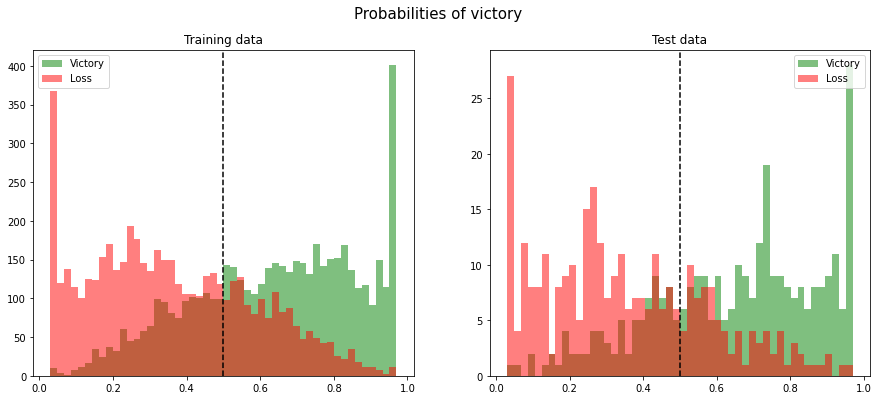

In [14]:
score = yearly_wrapper(train, test, y_train, y_test, oof_pred, test_pred, min_yr=2015, points=False)

In [15]:
coefs  = imp_coef['2019'].copy()

coefs.columns = ['mean_2019', 'std_2019']

for yr in ['2018', '2017', '2016', '2015']:
    tmp = imp_coef[yr].copy()
    tmp.columns = [f'mean_{yr}', f'std_{yr}']
    
    coefs = pd.merge(coefs, tmp, left_index=True, right_index=True)


coefs

,mean_2019,std_2019,mean_2018,std_2018,mean_2017,std_2017,mean_2016,std_2016,mean_2015,std_2015
feat,,,,,,,,,,
delta_Rank,-0.553636,0.005380,-0.591857,0.007068,-0.564663,0.008964,-0.534119,0.010504,-0.585320,0.010862
def_edge_Seed,-0.287854,0.014863,-0.313674,0.017824,-0.285334,0.014487,-0.324143,0.014408,-0.280249,0.017249
off_edge_Seed,-0.281778,0.014462,-0.305953,0.014911,-0.279826,0.011260,-0.317808,0.009976,-0.271491,0.010889
delta_OR,0.263003,0.013267,0.324501,0.014850,0.251377,0.014229,0.276526,0.016431,0.287632,0.017963
delta_off_rating,0.228844,0.018318,0.282802,0.021020,0.283930,0.017920,0.233419,0.017114,0.269632,0.018178
delta_high_seed,0.184418,0.023352,0.092574,0.025033,0.172568,0.024216,0.154671,0.024258,0.195583,0.024761
delta_Stl,0.183212,0.010741,0.168478,0.012798,0.194199,0.010296,0.167934,0.011834,0.202953,0.012520
delta_def_rating,-0.165497,0.006755,-0.164067,0.006671,-0.147333,0.008275,-0.162294,0.010877,-0.158682,0.013199
delta_opp_score,-0.145626,0.008576,-0.197110,0.009717,-0.206810,0.009335,-0.154898,0.010339,-0.202284,0.012924


In [19]:
for yr in test_pred.keys():
    tmp = test[yr].copy()
    tmp['true_label'] = y_test[yr]
    tmp['oof_pred'] = test_pred[yr]
    tmp['Season'] = yr
    tmp.to_csv(f'oof/2021_men_logit_{yr}.csv',index=False)

In [20]:
tmp = train['2019'].copy()
tmp['true_label'] = y_train[yr]
tmp['oof_pred'] = oof_pred[yr]
tmp.to_csv(f'oof/2021_men_logit_oof.csv',index=False)